Student Name : Rahman Maqsood                                                    
Registration No : F2021313011                                                    
Subject  : Foundation of Data Science                                            
Analysis Name : Car price Analysis 

# **Project : Car Price Data Analysis**

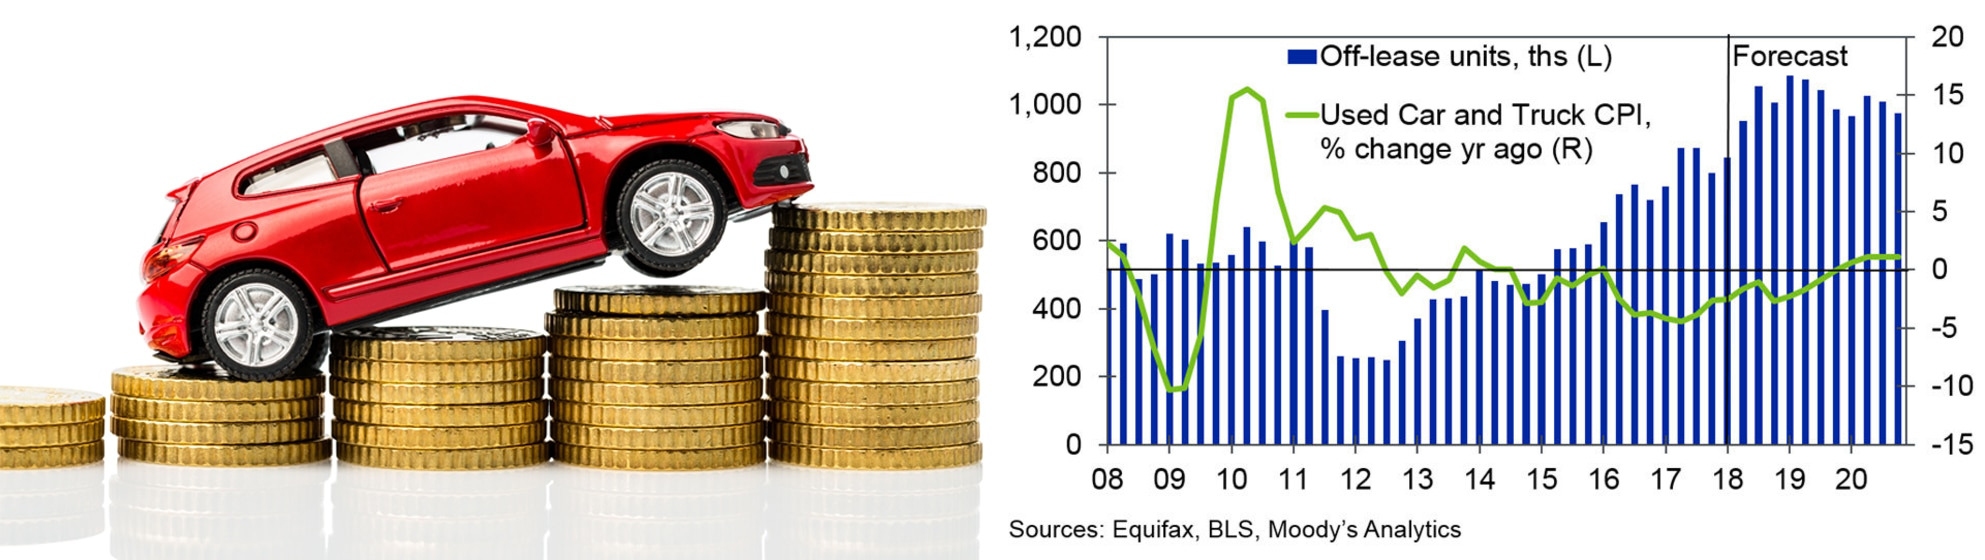

**Techniques for Data Analysis:**                                                
For Outliers Removal and Detection : Inter Quantile Range                          
For Modelling : Linear and Non-Linear Regression Analysis

In [ ]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Dataset and convert into dataframe
df = pd.read_csv('/content/Cardata.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
#The code describe the dispersion and tensdency of data points in dataset
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#To remove unneccessary columns and save results of new columns in new data frame
new_df = df[['year','selling_price','km_driven']]
new_df.head(10)

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
5,2007,140000,125000
6,2016,550000,25000
7,2014,240000,60000
8,2015,850000,25000
9,2017,365000,78000


In [ ]:
new_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


Below Code Reprensents the each variable visualization in a scatter plot for to check relationship between variables

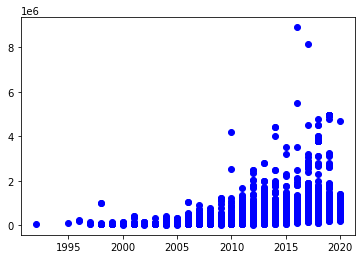

In [ ]:
plt.scatter(new_df.year,new_df.selling_price,color='blue')
plt.show()

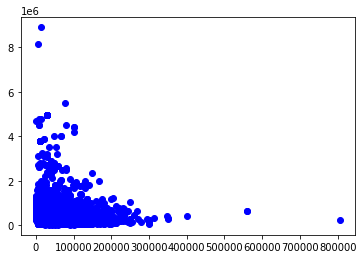

In [ ]:
plt.scatter(new_df.km_driven,new_df.selling_price,color='blue')
plt.show()

Below Code Reprensents the each variable visualization in box plots to check the outliers in dataset

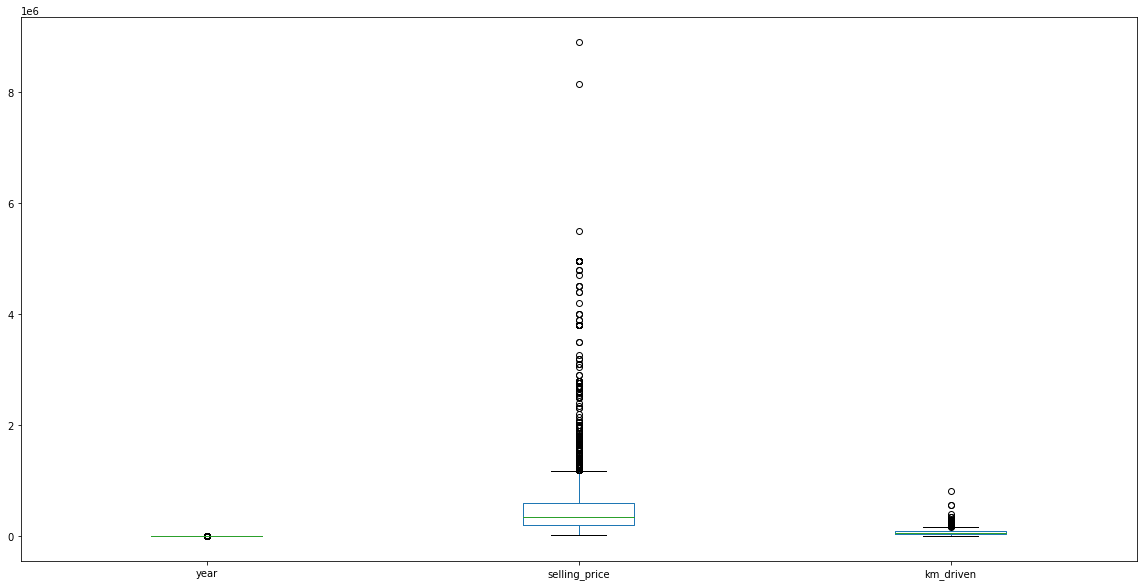

In [ ]:
new_df.plot(kind='box',figsize=(20,10))

## To remove the outliers Using inter Quantile Range Method in Selling Price 
Interquartile Range Overview
To visualize the interquartile range, imagine dividing your data into quarters. Statisticians refer to these quarters as quartiles and label them from low to high as Q1, Q2, Q3, and Q4. The lowest quartile (Q1) covers the smallest quarter of values in your dataset. The upper quartile (Q4) comprises the highest quarter of values. The interquartile range is the middle half of the data that lies between the upper and lower quartiles. In other words, the interquartile range includes the 50% of data points that are above Q1 and below Q4. The IQR is the red area in the graph below, containing Q2 and Q3 (not labeled).


IQR = Q3 – Q1

In [ ]:
# Calculate Q1, Q2, Q3 and IQR
Q1_selling_price,Q3_selling_price = new_df['selling_price'].quantile([0.25,0.75])  
print('Q1_selling_price 25 percentile of the given data is, ', Q1_selling_price)  
print('Q3_selling_price 75 percentile of the given data is, ', Q3_selling_price)
IQR_km_driven = Q3_km_driven - Q1_km_driven
print('Interquartile range for selling_price is : Q3 - Q1 = ', IQR_selling_price) 

# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively.
low_lim_selling_price = Q1_selling_price - 1.5 * IQR_selling_price
up_lim_selling_price = Q3_selling_price + 1.5 * IQR_selling_price
print('low_limit_selling_price is', low_lim_selling_price) 
print('up_limit_selling_price is', up_lim_selling_price) 
outlier_selling_price =[] 
for x in new_df["selling_price"]: 
    if ((x> up_lim_selling_price) or (x<low_lim_selling_price)): 
         outlier_selling_price.append(x) 
print(' outlier_selling_price in the dataset is', outlier_selling_price)

#assigning nan to the outliers
new_df['selling_price'].values[new_df['selling_price'] > up_lim_selling_price] = np.zeros(1)
new_df['selling_price'].values[new_df['selling_price'] < low_lim_selling_price] = np.zeros(1)

Q1_selling_price 25 percentile of the given data is,  160000.0
Q3_selling_price 75 percentile of the given data is,  535000.0
Interquartile range for selling_price is : Q3 - Q1 =  391250.25
low_limit_selling_price is -426875.375
up_limit_selling_price is 1121875.375
 outlier_selling_price in the dataset is [1150000, 1150000, 1125000, 1150000, 1150000, 1140000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1150000, 1165000, 1151000]


In [ ]:
# Calculate Q1, Q2, Q3 and IQR
Q1_km_driven,Q3_km_driven = new_df['km_driven'].quantile([0.25,0.75])  
print('Q1_km_driven 25 percentile of the given data is, ', Q1_km_driven)  
print('Q3_km_driven 75 percentile of the given data is, ', Q3_km_driven)
IQR_km_driven = Q3_km_driven - Q1_km_driven
print('Interquartile range for km_driven is : Q3 - Q1 = ', IQR_km_driven) 

# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively.
low_lim_km_driven = Q1_km_driven - 1.5 * IQR_km_driven
up_lim_km_driven = Q3_km_driven + 1.5 * IQR_km_driven
print('low_limit_km_driven is', low_lim_km_driven) 
print('up_limit_km_driven is', up_lim_km_driven) 
outlier_km_driven =[] 
for x in new_df["km_driven"]: 
    if ((x> up_lim_km_driven) or (x<low_lim_km_driven)): 
         outlier_km_driven.append(x) 
print(' outlier_km_driven in the dataset is', outlier_km_driven)

#assigning nan to the outliers
new_df['km_driven'].values[new_df['km_driven'] > up_lim_km_driven] = np.zeros(1)
new_df['km_driven'].values[new_df['km_driven'] < low_lim_km_driven] = np.zeros(1)

Q1_km_driven 25 percentile of the given data is,  30000.0
Q3_km_driven 75 percentile of the given data is,  86000.0
Interquartile range for km_driven is : Q3 - Q1 =  56000.0
low_limit_km_driven is -54000.0
up_limit_km_driven is 170000.0
 outlier_km_driven in the dataset is [172000]


In [ ]:
new_df.isnull().sum()

year             0
selling_price    0
km_driven        0
dtype: int64

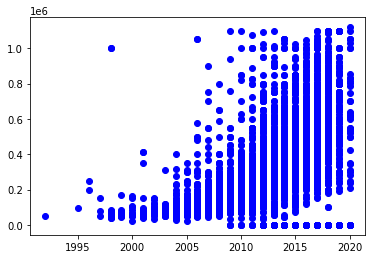

In [ ]:
plt.scatter(new_df.year,new_df.selling_price,color='blue')
plt.show()

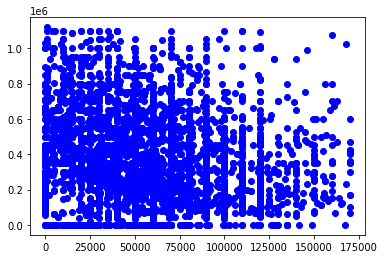

In [ ]:
plt.scatter(new_df.km_driven,new_df.selling_price,color='blue')
plt.show()

In [ ]:
df1_new = pd.read_csv('/content/Cardata.csv')
df1_new.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
#To remove unneccessary columns and save results of new columns in new data frame
df1_new = df1_new[['year','selling_price','km_driven']]
df1_new.head(10)

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
5,2007,140000,125000
6,2016,550000,25000
7,2014,240000,60000
8,2015,850000,25000
9,2017,365000,78000


In [ ]:
upper_limit = df1_new.selling_price.mean() + 3*df1_new.selling_price.std()
upper_limit

2239773.5201678076

In [ ]:
lower_limit = df1_new.selling_price.mean() - 3*df1_new.selling_price.std()
lower_limit

-1231518.8966655035

In [ ]:
df1_new[(df1_new.selling_price>upper_limit) | (df1_new.selling_price<lower_limit)]

,year,selling_price,km_driven
89,2017,8150000,6500
96,2013,2800000,49000
101,2018,4500000,9800
102,2017,2750000,13000
105,2012,2500000,48000
...,...,...,...
4047,2017,4500000,80000
4186,2017,2750000,41000
4224,2016,2500000,70000
4304,2018,3899000,22000


In [ ]:
df_no_outlier_std_dev = df1_new[(df1_new.selling_price<upper_limit) & (df1_new.selling_price>lower_limit)]
df_no_outlier_std_dev.head()

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


In [ ]:
df_no_outlier_std_dev.shape

(4248, 3)

In [ ]:
df1_new.shape

(4340, 3)

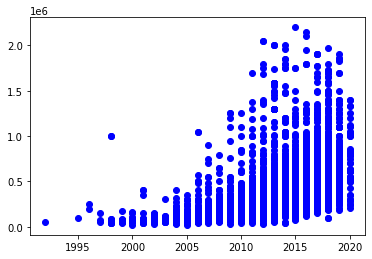

In [ ]:
plt.scatter(df_no_outlier_std_dev.year,df_no_outlier_std_dev.selling_price,color='blue')
plt.show()

# **Implemeent the Linear Regression Model with Second Teechnique Removal of Outlier**

In [ ]:
indx = np.random.rand(len(df_no_outlier_std_dev)) <0.8
train = df_no_outlier_std_dev[indx]
test = df_no_outlier_std_dev[~indx]

In [ ]:
train.shape, test.shape

((3409, 3), (839, 3))

In [ ]:
from sklearn import linear_model
new= linear_model.LinearRegression()


In [ ]:
train_x = np.asanyarray(train[['year','km_driven']])
train_y = np.asanyarray(train['selling_price'])
new.fit(train_x,train_y)


LinearRegression()

In [ ]:
print('Theta-0: ', new.coef_)
print('Intercept:' , new.intercept_)

Theta-0:  [4.35247001e+04 5.63998664e-02]
Intercept: -87179709.7799293


In [ ]:
y_hat = new.predict([[2007,12500]])
#66.0 + 10.47*2.5 + 7.70*6 + 9.52*8.5
y_hat

array([175068.28513974])

In [ ]:
test_x = np.asanyarray(test[['year','km_driven']])
test_y = np.asanyarray(test['selling_price'])
test_y_hat =new.predict(test_x)
test_x

array([[ 2007, 50000],
       [ 2017, 46000],
       [ 2017, 78000],
       ...,
       [ 2019, 15000],
       [ 2014, 82000],
       [ 2015, 40000]])

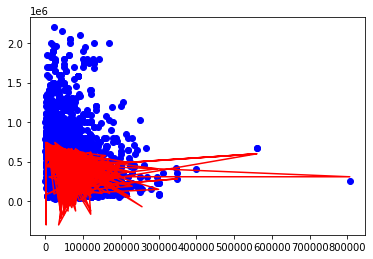

In [ ]:
plt.scatter(df_no_outlier_std_dev.km_driven,df_no_outlier_std_dev.selling_price,color='blue')
plt.plot(test_x,test_y_hat,'r-')
plt.show()

In [ ]:
print('Residual Error (MSE): %2f'  %np.mean(test_y -test_y_hat) **2)

Residual Error (MSE): 19709597.272103


In [ ]:
from sklearn.metrics import r2_score
print('R2 Score: %2f'%r2_score(test_y,test_y_hat))

R2 Score: 0.243130


# **Findings Show that the No Linear relationship between the Selling Price (Dependent) and Km Driven,Year (Independent Rate)**

**Results Give 0.243130 Similarity Index Rate the accuracy is low because of model does not find the better prediction till after removing ouliers with IQR and standard Deviation Techniques**